**Содержание**<a name="start"></a>
0. [Описание задачи](#Описание_задачи)  
   -[Описание датасета](#Описание_датасета)
1. [Первичный осмотр данных](#Первичный_осмотр_данных)  
2. [Первичный анализ данных](#Первичный_анализ_данных)   
  2.1. [school](#school)  
  2.2. [sex](#sex)  
  2.3. [age](#age)  
  2.4. [address](#address)  
  2.5. [famsize](#famsize)  
  2.6. [pstatus](#pstatus)  
  2.7. [medu](#medu)    
  2.8. [fedu](#fedu)  
  2.9. [mjob](#mjob)  
  2.10. [fjob](#fjob)  
  2.11. [reason](#reason)  
  2.12. [guardian](#guardian)  
  2.13. [traveltime](#traveltime)  
  2.14. [studytime](#studytime)  
  2.15. [failures](#failures)    
  2.16. [schoolsup](#schoolsup)  
  2.17. [famsup](#famsup)  
  2.18. [paid](#paid)  
  2.19. [activities](#activities)  
  2.20. [nursery](#nursery)  
  2.21. [higher](#higher)  
  2.22. [internet](#internet)  
  2.23. [romantic](#romantic)  
  2.24. [famrel](#famrel)  
  2.25. [freetime](#freetime)  
  2.26. [goout](#goout)  
  2.27. [health](#health)  
  2.28. [absences](#absences)  
  2.29. [studytime_granular](#studytime_granular)  
  2.30. [score](#score)   
3. [Корреляционный анализ](#корреляционный_анализ)
4. [Анализ номинативных переменных](#анализ_номинативных_переменных)  
  4.1 [Датасет для моделирования](#датасет_для_моделирования)
5. [Выводы](#выводы)
  

# 0. Описание задачи <a name="Описание_задачи"></a>

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.   
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.  
И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

### Описание датасета <a name="Описание_датасета"></a>

1 school — аббревиатура школы, в которой учится ученик  
2 sex — пол ученика ('F' - женский, 'M' - мужской)  
3 age — возраст ученика (от 15 до 22)  
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)  
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)  
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)   
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)   
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)   
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)   
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)  
16 schoolsup — дополнительная образовательная поддержка (yes или no)  
17 famsup — семейная образовательная поддержка (yes или no)  
18 paid — дополнительные платные занятия по математике (yes или no)  
19 activities — дополнительные внеучебные занятия (yes или no)  
20 nursery — посещал детский сад (yes или no)  
21 higher — хочет получить высшее образование (yes или no)  
22 internet — наличие интернета дома (yes или no)  
23 romantic — в романтических отношениях (yes или no)  
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
28 absences — количество пропущенных занятий  
29 score — баллы по госэкзамену по математике  

# 1. Первичный осмотр данных <a name="Первичный_осмотр_данных"></a>

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [225]:
df = pd.read_csv('stud_math.csv')
pd.set_option('display.max_columns', 40)  # показывать больше колонок
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [226]:
# Для удобства переименуем столбец 'studytime, granular' в 'studytime_granular' и приведём названия столбцов в нижний регистр
df.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)
for s in df:
    df.rename(columns={s: s.lower()}, inplace=True)

df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

Всего записей: 395  
Всего столбцов: 30  
В описании 29 столбцов,не хватает описания 'studytime_granular'

**Из описания и первичного осмотра данных можно разбить колонки по признакам:**
-**категориальный**:'medu','fedu','mjob','fjob','reason','guardian','traveltime','studytime','failures','famrel',
'freetime','goout','health'
-**бинарный**:'sex','address','famsize','pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet',
'romantic'  
-**числовой**:'age','absences','score'  
-**не известно**: 'school','studytime_granular'  

# 2. Первичный анализ данных в столбцах <a name="Первичный_анализ_данных"></a>

In [228]:
# Вывод информации об уникальных значениях и пропусках
def show_info_col(column, landmark=10):
    col = df[column]
    print('Уникальных значений:', col.nunique())
    print(f'Значений, встретившихся в столбце более {landmark} раз:', (col.value_counts(
    ) > landmark).sum())
    skip_num = len(df[df[column].isnull()])
    print('Пропусков:', skip_num)
    if skip_num > 0:
        print('Процент пропусков:', round(skip_num/df.shape[0] * 100))
    print(col.value_counts())


# Вывод информации о границах выбросов (имя колонки,начало диапазона,конец диапазона,бинс)
def show_emis_limits(column, start, end, k=1.5, bins=10):
    col = df[column]
    median = col.median()
    IQR = col.quantile(0.75) - col.quantile(0.25)
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - k*IQR, l=perc75 + k*IQR))
    col.loc[col.between(perc25 - k*IQR, perc75 + k*IQR)].hist(bins=bins, range=(start, end),
                                                              label='IQR')
    plt.legend()

## Общий анализ столбцов

In [229]:
# проверим на дубли строк
len(df[df.duplicated(keep=False) == True])

0

In [230]:
# Проверим количество пустых строк
for s in df.columns:
    col = df[s]
    count = 0
    for x in col:
        if isinstance(x, str) and x.strip() == '':
            count += 1
    print('Пустых строк в {}:'.format(s), count)

Пустых строк в school: 0
Пустых строк в sex: 0
Пустых строк в age: 0
Пустых строк в address: 0
Пустых строк в famsize: 0
Пустых строк в pstatus: 0
Пустых строк в medu: 0
Пустых строк в fedu: 0
Пустых строк в mjob: 0
Пустых строк в fjob: 0
Пустых строк в reason: 0
Пустых строк в guardian: 0
Пустых строк в traveltime: 0
Пустых строк в studytime: 0
Пустых строк в failures: 0
Пустых строк в schoolsup: 0
Пустых строк в famsup: 0
Пустых строк в paid: 0
Пустых строк в activities: 0
Пустых строк в nursery: 0
Пустых строк в studytime_granular: 0
Пустых строк в higher: 0
Пустых строк в internet: 0
Пустых строк в romantic: 0
Пустых строк в famrel: 0
Пустых строк в freetime: 0
Пустых строк в goout: 0
Пустых строк в health: 0
Пустых строк в absences: 0
Пустых строк в score: 0


В данных нет дублей и пустых строк

## Детальный анализ столбцов

### School — аббревиатура школы, в которой учится ученик <a name="school"></a>

In [231]:
show_info_col('school')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 0
GP    349
MS     46
Name: school, dtype: int64


2 уникальных значения , пропусков нет. Похоже это бинарный признак. Данные чистые,без ошибок

### Sex — пол ученика ('F' - женский, 'M' - мужской) <a name="sex"></a>

In [232]:
show_info_col('sex')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 0
F    208
M    187
Name: sex, dtype: int64


2 уникальных значения , пропусков нет. Данные чистые,без ошибок

### Age — возраст ученика (от 15 до 22) <a name="age"></a>

In [233]:
show_info_col('age')

Уникальных значений: 8
Значений, встретившихся в столбце более 10 раз: 5
Пропусков: 0
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


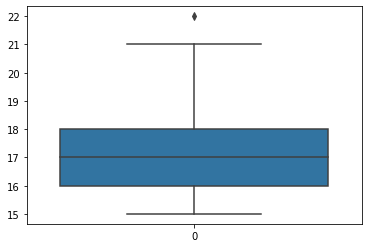

In [234]:
# Судя по значениям,возможно есть выбросы,проверим
sns.boxplot(data=df.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


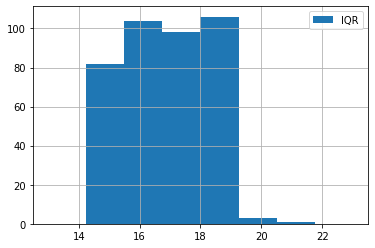

In [235]:
# Определим границу выбросов с помощью формулы интерквартильного расстояния
show_emis_limits('age', 13, 23, bins=8)

8 уникальных значений , пропусков нет. Возраст 22 может показаться выбросом, но из описания задания следует, что исследуется возраст учеников от 15 до 22 , соответственно,считаю,что 22 не является выбросом. Данные чистые,без ошибок

### Address — тип адреса ученика ('U' - городской, 'R' - за городом) <a name="address"></a>

In [236]:
show_info_col('address')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 17
Процент пропусков: 4
U    295
R     83
Name: address, dtype: int64


2 уникальных значения, 17 пропусков (4% от общего количества записей), не критично. Данные чистые,без ошибок

### Famsize — размер семьи('LE3' <= 3, 'GT3' >3) <a name="famsize"></a>

In [237]:
show_info_col('famsize')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 27
Процент пропусков: 7
GT3    261
LE3    107
Name: famsize, dtype: int64


2 уникальных значения, 27 пропусков (7% от общего количества записей), не критично. Данные чистые,без ошибок

### Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно) <a name="pstatus"></a>

In [238]:
show_info_col('pstatus')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 45
Процент пропусков: 11
T    314
A     36
Name: pstatus, dtype: int64


2 уникальных значения, 45 пропусков (11% от общего количества записей). Существенный процент пропусков,но чем заменить пропуски,пока не ясно. Исключать этот признак полностью тоже не следует, так как для это требуется хотя бы 50% пропусков. 
Данные чистые,без ошибок

### Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <a name="medu"></a>

In [239]:
show_info_col('medu')

Уникальных значений: 5
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 3
Процент пропусков: 1
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64


2 уникальных значения, 3 пропуска (1% от общего количества записей), не критично. Строк со значением 0 всего 3, но так как они есть в описании,удалять их не следует.

### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <a name="fedu"></a>

In [240]:
show_info_col('fedu')

Уникальных значений: 6
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 24
Процент пропусков: 6
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64


In [241]:
#Выделяется значение 40,которого нет в описании.Скорее всего это ошибка ввода.Поменяем значение на 4
df.loc[df['fedu'] == 40,'fedu'] = 4.0
show_info_col('fedu')

Уникальных значений: 5
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 24
Процент пропусков: 6
2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64


5 уникальных значений, 24 пропуска (6% от общего количества записей), не критично. Данные чистые,без ошибок

### Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <a name="mjob"></a>

In [242]:
show_info_col('mjob')

Уникальных значений: 5
Значений, встретившихся в столбце более 10 раз: 5
Пропусков: 19
Процент пропусков: 5
other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64


5 уникальных значений, 19 пропуска (5% от общего количества записей), не критично. Данные чистые,без ошибок

### Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <a name="fjob"></a>

In [243]:
show_info_col('fjob')

Уникальных значений: 5
Значений, встретившихся в столбце более 10 раз: 5
Пропусков: 36
Процент пропусков: 9
other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64


5 уникальных значений, 36 пропусков (9% от общего количества записей), не критично. Данные чистые,без ошибок

### Reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) <a name="reason"></a>

In [244]:
show_info_col('reason')

Уникальных значений: 4
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 17
Процент пропусков: 4
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


4 уникальных значения, 17 пропусков (4% от общего количества записей), не критично. Данные чистые,без ошибок

### Guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое) <a name="guardian"></a>

In [245]:
show_info_col('guardian')

Уникальных значений: 3
Значений, встретившихся в столбце более 10 раз: 3
Пропусков: 31
Процент пропусков: 8
mother    250
father     86
other      28
Name: guardian, dtype: int64


3 уникальных значения, 31 пропуск (8% от общего количества записей), не критично. Данные чистые,без ошибок

### Traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  <a name= "traveltime"><a/>

In [246]:
show_info_col('traveltime')

Уникальных значений: 4
Значений, встретившихся в столбце более 10 раз: 3
Пропусков: 28
Процент пропусков: 7
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


4 уникальных значения, 28 пропусков (7% от общего количества записей), не критично. Данные чистые,без ошибок

### Studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) <a name="studytime"></a>

In [247]:
show_info_col('studytime')

Уникальных значений: 4
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 7
Процент пропусков: 2
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


4 уникальных значения, 7 пропусков (2% от общего количества записей), не критично. Данные чистые,без ошибок


### Failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0) <a name ="failures"></a>

In [248]:
show_info_col('failures')

Уникальных значений: 4
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 22
Процент пропусков: 6
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


4 уникальных значения, 22 пропуска (6% от общего количества записей), не критично. Данные чистые,без ошибок

### Schoolsup — дополнительная образовательная поддержка (yes или no) <a name="schoolsup"></a>

In [249]:
show_info_col('schoolsup')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 9
Процент пропусков: 2
no     335
yes     51
Name: schoolsup, dtype: int64


2 уникальных значения, 9 пропусков (2% от общего количества записей), не критично. Данные чистые,без ошибок

### Famsup — семейная образовательная поддержка (yes или no) <a name="famsup"></a>

In [250]:
show_info_col('famsup')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 39
Процент пропусков: 10
yes    219
no     137
Name: famsup, dtype: int64


2 уникальных значения, 39 пропусков (10% от общего количества записей). Существенный процент пропусков,но чем заменить пропуски,пока не ясно. Данные чистые,без ошибок

### Paid — дополнительные платные занятия по математике (yes или no) <a name="paid"></a>

In [251]:
show_info_col('paid')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 40
Процент пропусков: 10
no     200
yes    155
Name: paid, dtype: int64


2 уникальных значения, 40 пропусков (10% от общего количества записей). Существенный процент пропусков,но чем заменить пропуски,пока не ясно. Данные чистые,без ошибок

### Activities — дополнительные внеучебные занятия (yes или no) <a name="activities"></a>

In [252]:
show_info_col('activities')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 14
Процент пропусков: 4
yes    195
no     186
Name: activities, dtype: int64


2 уникальных значения, 14 пропусков (4% от общего количества записей), не критично.Данные чистые,без ошибок

### Nursery — посещал детский сад (yes или no) <a name="nursery"></a>

In [253]:
show_info_col('nursery')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 16
Процент пропусков: 4
yes    300
no      79
Name: nursery, dtype: int64


2 уникальных значения, 16 пропусков (4% от общего количества записей), не критично.Данные чистые,без ошибок

### Higher — хочет получить высшее образование (yes или no) <a name="higher"></a>

In [254]:
show_info_col('higher')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 20
Процент пропусков: 5
yes    356
no      19
Name: higher, dtype: int64


2 уникальных значения, 20 пропусков (5% от общего количества записей), не критично.Данные чистые,без ошибок.
Заметен явный перевес желающих получить высшее образование.

### Internet — наличие интернета дома (yes или no) <a name="internet"></a>

In [255]:
show_info_col('internet')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 34
Процент пропусков: 9
yes    305
no      56
Name: internet, dtype: int64


2 уникальных значения, 34 пропуска (9% от общего количества записей), не критично.Данные чистые,без ошибок.

### Romantic — в романтических отношениях (yes или no) <a name="romantic"></a>

In [256]:
show_info_col('romantic')

Уникальных значений: 2
Значений, встретившихся в столбце более 10 раз: 2
Пропусков: 31
Процент пропусков: 8
no     240
yes    124
Name: romantic, dtype: int64


2 уникальных значения, 31 пропуск (8% от общего количества записей), не критично.Данные чистые,без ошибок.

### Famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) <a name="famrel"></a>

In [257]:
show_info_col('famrel')

Уникальных значений: 6
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 27
Процент пропусков: 7
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


In [258]:
#Выделяется значение -1,которого нет в описании.Скорее всего это ошибка ввода.Поменяем значение на 1
df.loc[df['famrel'] == -1,'famrel'] = 1
show_info_col('famrel')

Уникальных значений: 5
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 27
Процент пропусков: 7
4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64


5 уникальных значений, 27 пропуск (7% от общего количества записей), не критично.Данные чистые,без ошибок.

### Freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого) <a name="freetime"></a>

In [259]:
show_info_col('freetime')

Уникальных значений: 5
Значений, встретившихся в столбце более 10 раз: 5
Пропусков: 11
Процент пропусков: 3
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


5 уникальных значений, 11 пропусков (3% от общего количества записей), не критично.Данные чистые,без ошибок.

### Goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много) <a name="goout"></a>

In [260]:
show_info_col('goout')

Уникальных значений: 5
Значений, встретившихся в столбце более 10 раз: 5
Пропусков: 8
Процент пропусков: 2
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


5 уникальных значений, 8 пропусков (2% от общего количества записей), не критично.Данные чистые,без ошибок.

### Health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) <a name="health"></a>

In [261]:
show_info_col('health')

Уникальных значений: 5
Значений, встретившихся в столбце более 10 раз: 5
Пропусков: 15
Процент пропусков: 4
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


5 уникальных значений, 15 пропусков (4% от общего количества записей), не критично.Данные чистые,без ошибок.

### Absences — количество пропущенных занятий <a name="absences"></a>

In [262]:
show_info_col('absences')

Уникальных значений: 36
Значений, встретившихся в столбце более 10 раз: 8
Пропусков: 12
Процент пропусков: 3
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


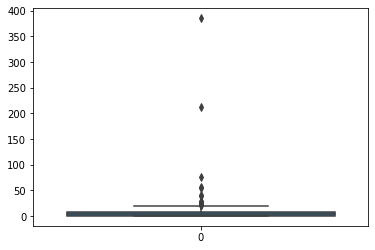

In [263]:
# Судя по значениям,возможно есть выбросы,проверим
sns.boxplot(data=df.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


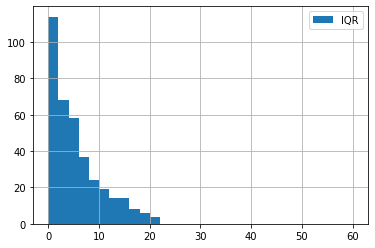

In [264]:
# Определим границу выбросов с помощью формулы интерквартильного расстояния
show_emis_limits('absences', 0, 60, bins=30)

In [265]:
# Немного смягчим границу выбросов до 30(т.к. при до 20 отфильтровывается слишком много потенциально реальных значений)
# и отфильтруем лишние строки
df = df.loc[df.absences <= 30]

In [266]:
show_info_col('absences')

Уникальных значений: 29
Значений, встретившихся в столбце более 10 раз: 8
Пропусков: 0
0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
1.0       3
9.0       3
13.0      2
11.0      2
15.0      2
17.0      1
25.0      1
26.0      1
23.0      1
28.0      1
21.0      1
30.0      1
19.0      1
24.0      1
Name: absences, dtype: int64


29 уникальных значений, 0 пропусков.Удалены строки со значениями меньше 30

### Studytime_granular - нет в описании <a name="studytime_granular"></a>

In [267]:
show_info_col('studytime_granular')

Уникальных значений: 4
Значений, встретившихся в столбце более 10 раз: 4
Пропусков: 5
Процент пропусков: 1
-6.0     184
-3.0      99
-9.0      61
-12.0     27
Name: studytime_granular, dtype: int64


In [268]:
#На первый взгляд категориальный признак. Попробуем сверить колонку с похожей по названию "studytime"
df.loc[:,['studytime','studytime_granular']]

,studytime,studytime_granular
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
389,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [269]:
#Визуально напрашивается корреляция колонок (умножение на -3). Проверим
print(df['studytime'].value_counts())
print(df['studytime_granular'].value_counts())
df['studytime'].corr(df['studytime_granular'])

2.0    184
1.0     99
3.0     61
4.0     27
Name: studytime, dtype: int64
-6.0     184
-3.0      99
-9.0      61
-12.0     27
Name: studytime_granular, dtype: int64


-0.9999999999999997

In [270]:
#Действительно,так оно и есть.На лицо обратная корреляция,можно удалить колонку.
df.drop('studytime_granular', inplace = True, axis = 1)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      376 non-null    object 
 1   sex         376 non-null    object 
 2   age         376 non-null    int64  
 3   address     361 non-null    object 
 4   famsize     352 non-null    object 
 5   pstatus     335 non-null    object 
 6   medu        373 non-null    float64
 7   fedu        352 non-null    float64
 8   mjob        358 non-null    object 
 9   fjob        341 non-null    object 
 10  reason      359 non-null    object 
 11  guardian    346 non-null    object 
 12  traveltime  348 non-null    float64
 13  studytime   371 non-null    float64
 14  failures    354 non-null    float64
 15  schoolsup   367 non-null    object 
 16  famsup      339 non-null    object 
 17  paid        337 non-null    object 
 18  activities  362 non-null    object 
 19  nursery     360 non-null    o

Колонку удалил,так как у неё полная обратная корреляция с studytime

### Score — баллы по госэкзамену по математике <a name="score"></a>

In [272]:
#удалим строки с пропусками перед анализом целевой переменной
df = df[df.score.isnull() == False]

In [273]:
show_info_col('score')

Уникальных значений: 18
Значений, встретившихся в столбце более 10 раз: 12
Пропусков: 0
50.0     53
55.0     44
0.0      36
75.0     31
65.0     31
60.0     29
70.0     27
40.0     27
45.0     25
80.0     16
30.0     15
90.0     11
35.0      9
25.0      7
95.0      5
85.0      3
100.0     1
20.0      1
Name: score, dtype: int64


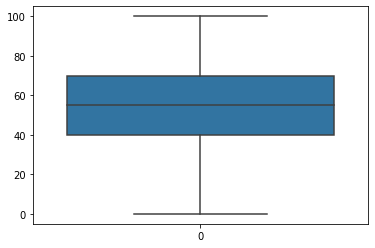

In [274]:
# Судя по значениям,возможно есть выбросы,проверим
sns.boxplot(data=df.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


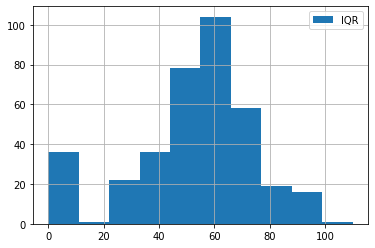

In [275]:
show_emis_limits('score', 0, 110, bins=10)

Пропуски удалены,т.к. это целевая переменная. Все значения попадают в границу выбросов, на boxplot также явных выбросов нет. Интересно,что в 37 строках значения 0. Это может означать ошибку ввода данных,либо плохую учебу,либо ученик не пришел на экзамен и т.д. Можно было бы разбить колонку на 2: сама оценка и будет ли 0(вериятность событий,при которых значение 0). Более ясно станет при построении модели.

# 3. Корреляционный анализ <a name="корреляционный_анализ"></a>

In [276]:
#Проведем корреляционный анализ для числовых столбцов
df_num = df[['age', 'absences', 'score']]

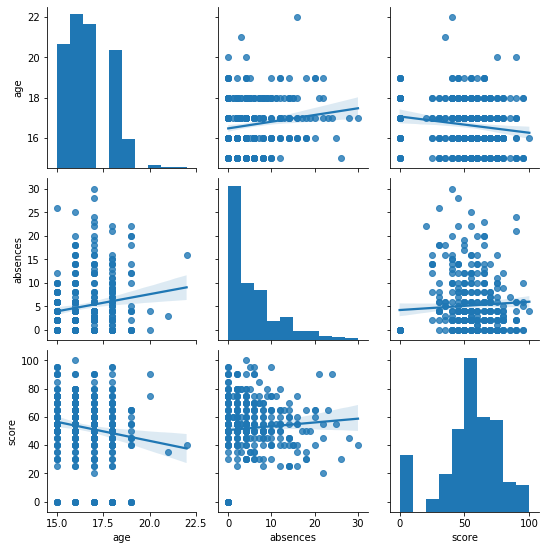

In [277]:
sns.pairplot(df_num,kind = 'reg')

In [278]:
df_num.corr()

,age,absences,score
age,1.000000,0.155755,-0.147750
absences,0.155755,1.000000,0.068886
score,-0.147750,0.068886,1.000000


Оставляем age и absences, т.к. они слабо скоррелированы между собой.
Заметна небольшая обратная корреляция между age и score, т.е. чем выше age,тем меньше score

# 4. Анализ номинативных переменных <a name="анализ_номинативных_переменных"></a>

In [279]:
# показать график плотности распределения переменных score
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# тест Стьюдента
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [280]:
# Для удобства разобьем категориальные и бинарные признаки
# категориальные
cat_list = ['medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime',
            'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']
# бинарные
bin_list = ['school', 'sex', 'address', 'famsize', 'pstatus', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
# общий список
all_col_list = []
all_col_list.extend(cat_list)
all_col_list.extend(bin_list)

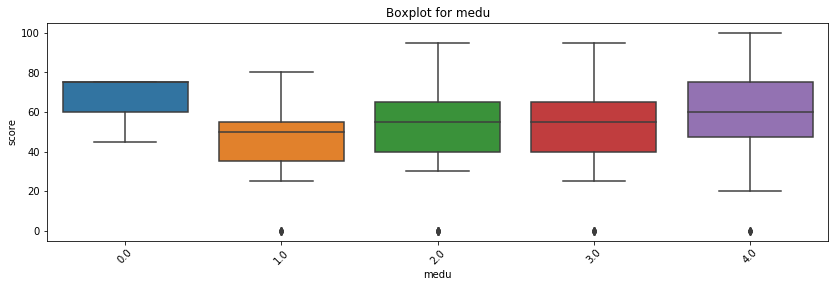

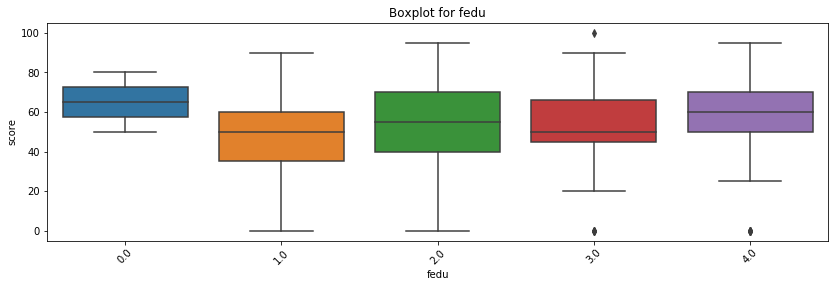

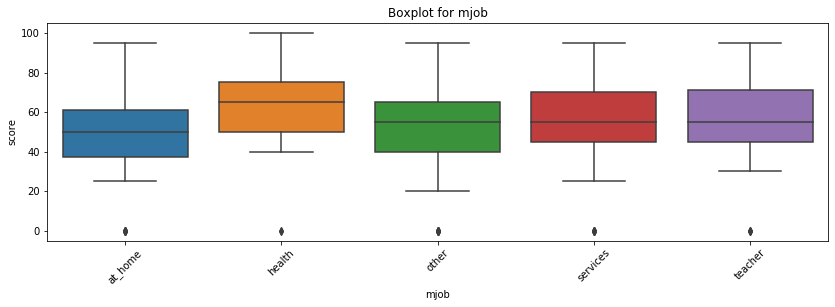

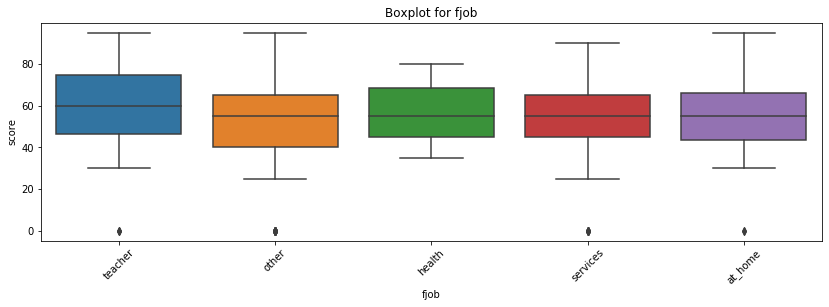

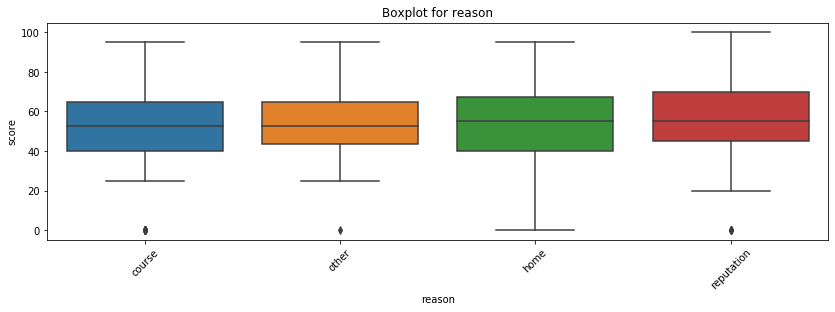

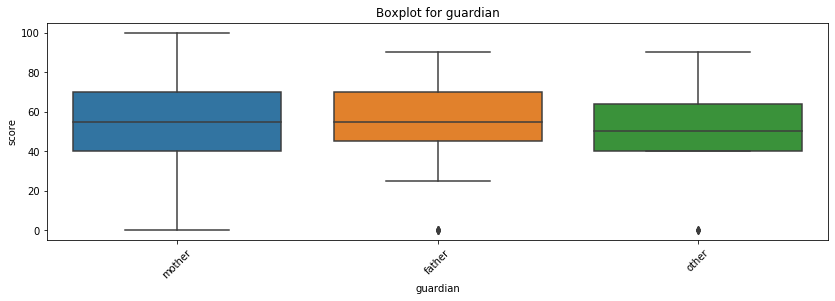

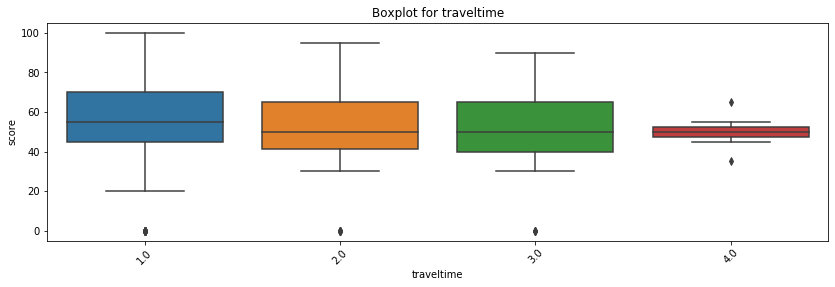

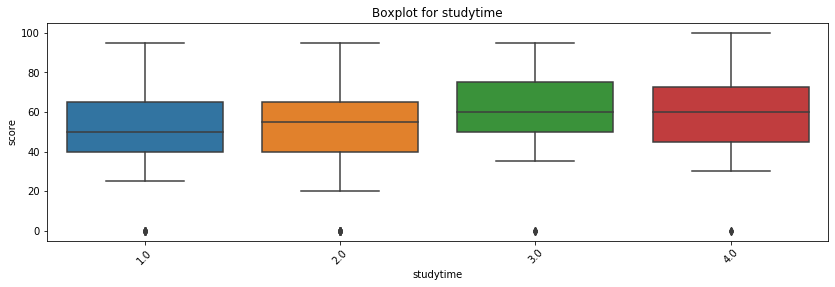

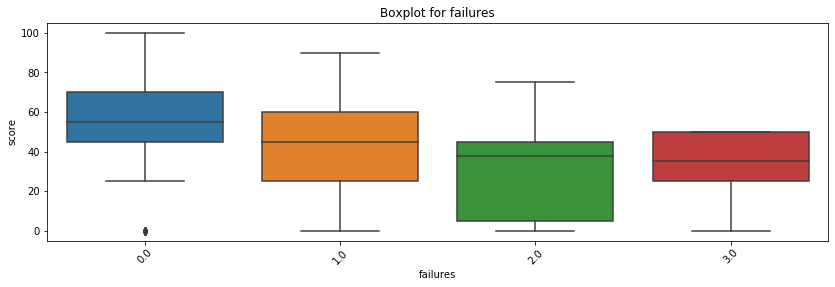

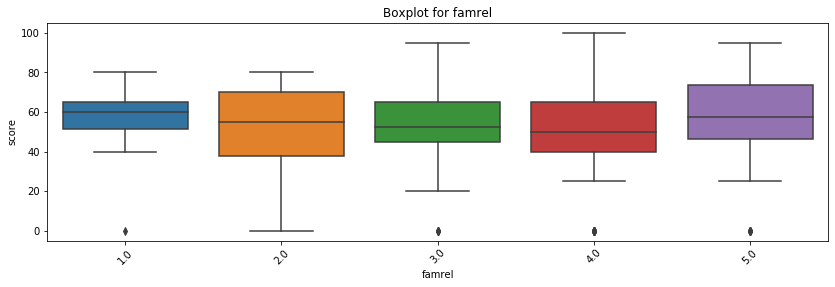

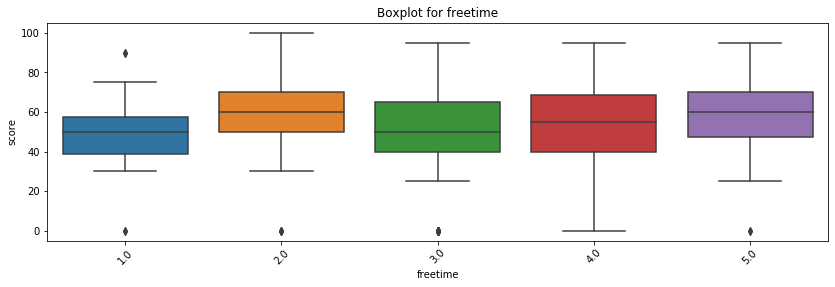

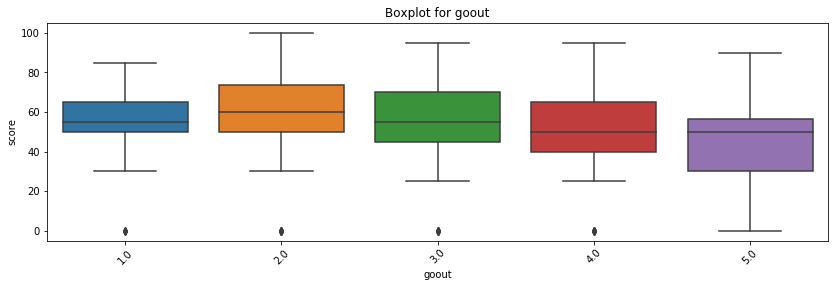

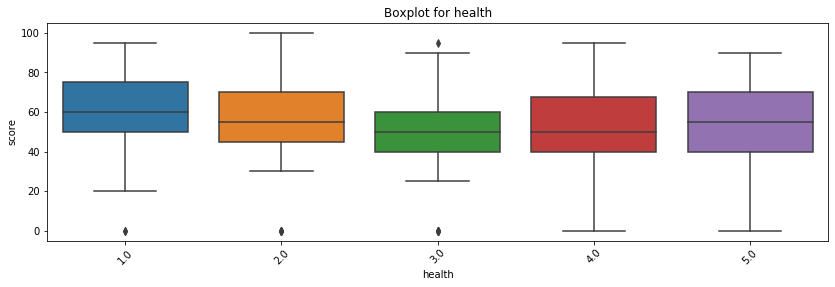

In [281]:
# Анализ категориальный признаков
for col in cat_list:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме reason и quardian, могут существенно влиять на score.


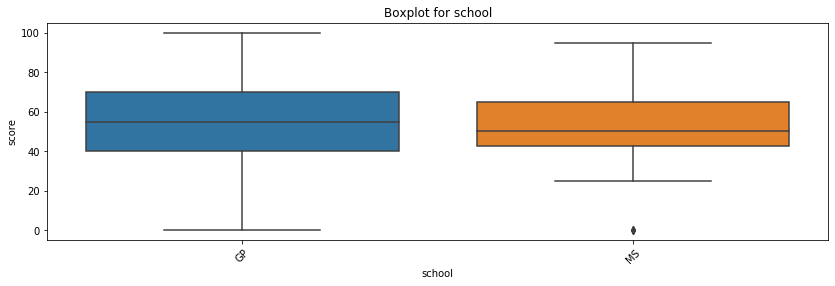

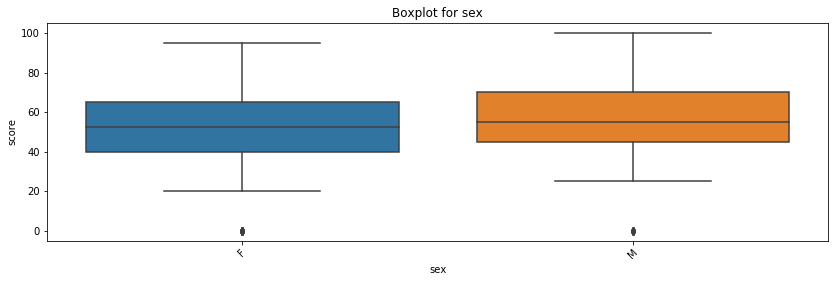

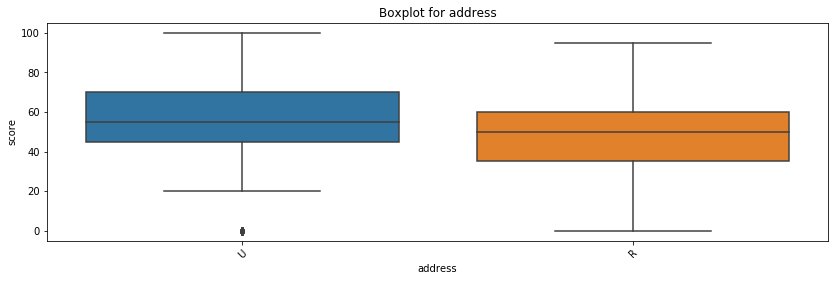

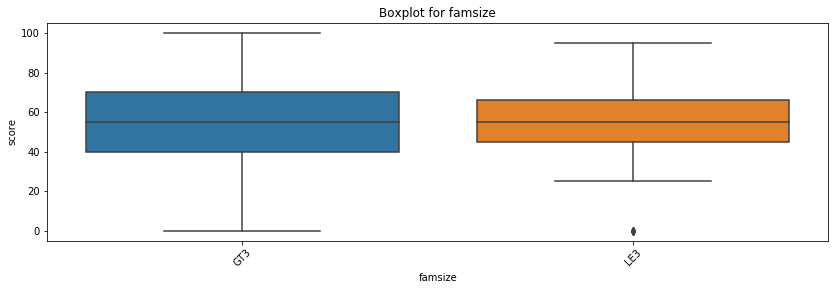

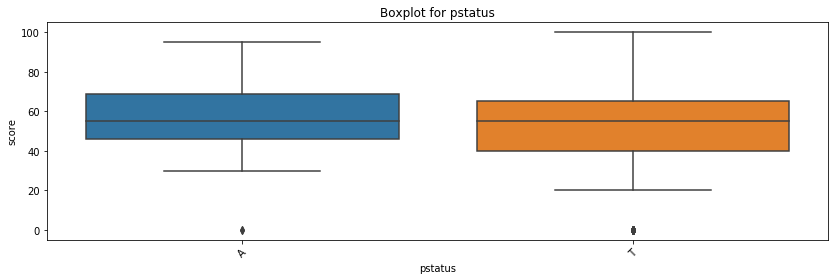

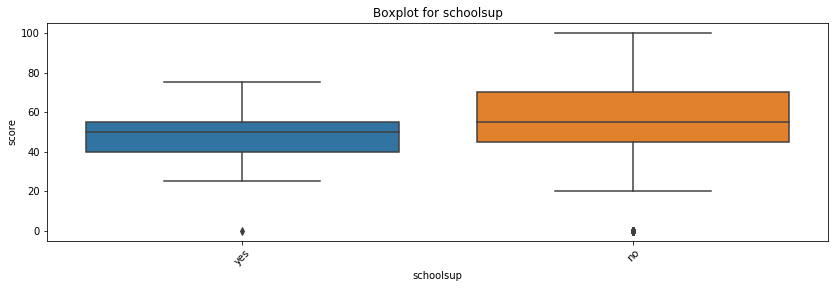

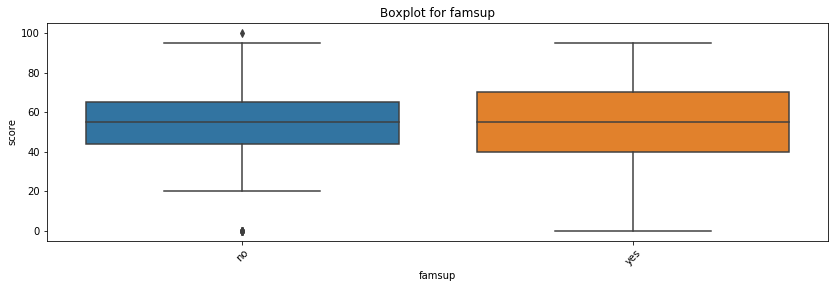

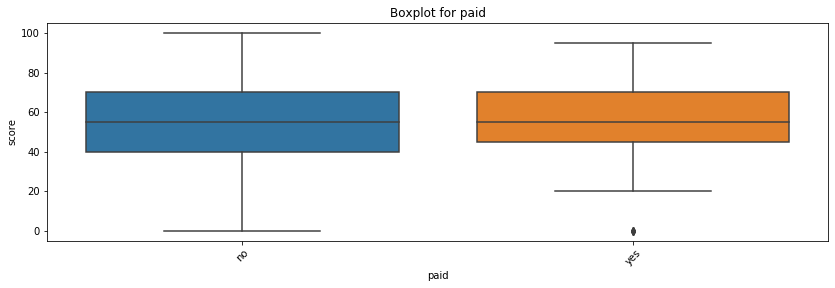

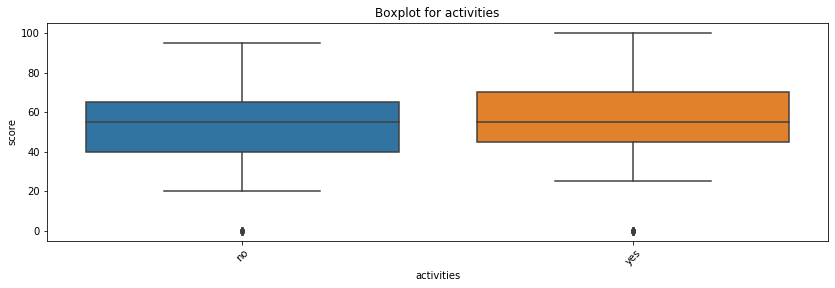

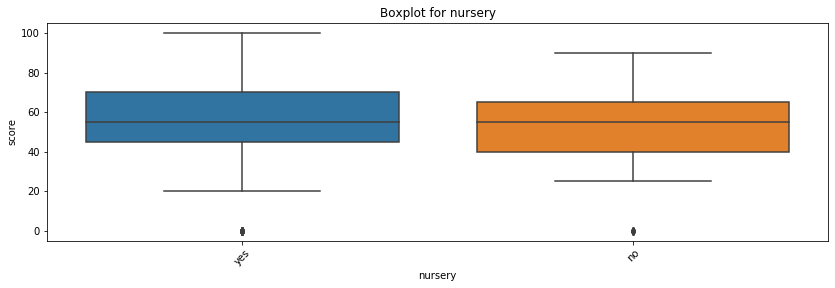

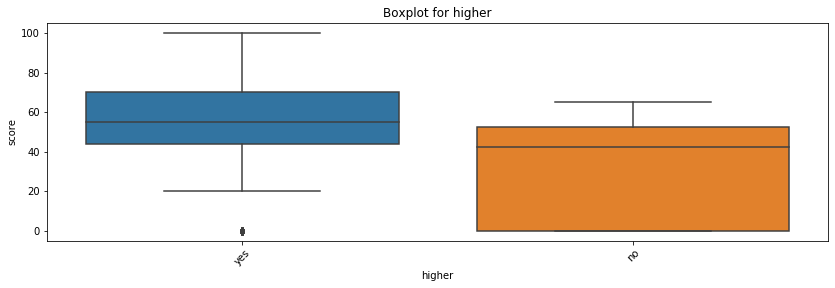

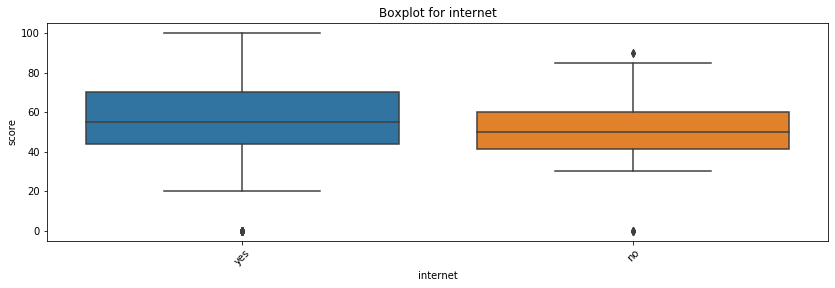

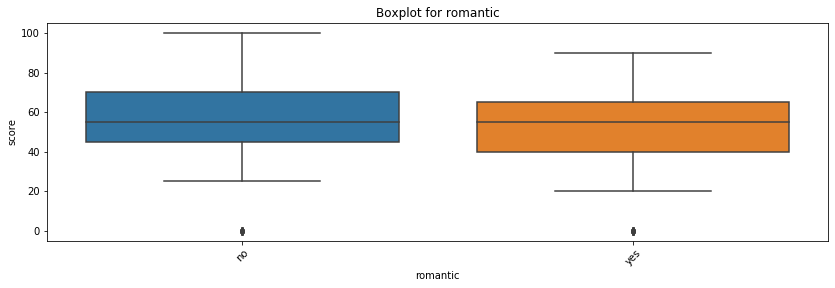

In [282]:
# Анализ бинарных признаков
for col in bin_list:
    get_boxplot(col)

По графикам похоже,что address,schoolsup,higher,internet могут существенно влиять на score.

Посмотрим,что покажет тест Стьюдента

In [283]:
# С помощью теста Стьюдента проверим нулевую гипотезу о том, что распределения scroe по различным параметрам неразличимы
for col in all_col_list:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются 8 параметров: medu,mjob,failures,goout,sex,address,higher,romantic

***Датасет для моделирования*** <a name="датасет_для_моделирования"></a>

In [284]:
# Подготовим датасет для дальнейшего построения модели
df_model = df.loc[:, ['medu', 'mjob', 'failures', 'goout', 'sex',
                      'address', 'higher', 'romantic', 'age', 'absences', 'score']]
df_model.head()

,medu,mjob,failures,goout,sex,address,higher,romantic,age,absences,score
0,4.0,at_home,0.0,4.0,F,U,yes,no,18,6.0,30.0
1,1.0,at_home,0.0,3.0,F,U,yes,no,17,4.0,30.0
2,1.0,at_home,3.0,2.0,F,U,yes,NaN,15,10.0,50.0
3,4.0,health,0.0,2.0,F,U,yes,yes,15,2.0,75.0
4,3.0,other,0.0,2.0,F,U,yes,no,16,4.0,50.0


In [285]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 394
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   medu      368 non-null    float64
 1   mjob      353 non-null    object 
 2   failures  349 non-null    float64
 3   goout     364 non-null    float64
 4   sex       371 non-null    object 
 5   address   357 non-null    object 
 6   higher    352 non-null    object 
 7   romantic  340 non-null    object 
 8   age       371 non-null    int64  
 9   absences  371 non-null    float64
 10  score     371 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 44.8+ KB


# 5. Выводы <a name="выводы"></a>

В результате EDA для анализа влияния критериев датасета на модель,предсказывающую результаты госэкзамена по математике для каждого ученика школы, были получены следующие выводы:
- В данных немного пустых значений.Полностью заполнены колонки school,sex и age. В остальных колонках маскимальный размеров пропусков доходил до 12%
- Выбросы найдены только в колонке absences, что позволяет сделать вывод о том, что данные достаточно чистые.
- Существенной корреляции между числовыми параметрами нет.Заметна только небольшая обратная корреляция между возрастом и оценкой,а именно: чем выше возраст,тем меньше оценка за госэкзамен
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это medu,mjob,failures,goout,sex,address,higher,romantic,age,absences,score